In [2]:
import sklearn 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('C:\\Users\\hp probook\\Desktop\\research_papers_classification\\scraping_data\\final_data.csv')
data.head()

,url,abstract,task
0,https://paperswithcode.com/paper/02-dualities-...,"We propose that a simple, Lagrangian 2d $\math...",Computer Vision
1,https://paperswithcode.com/paper/190409925\n,Convolutional networks have been the paradigm ...,Computer Vision
2,https://paperswithcode.com/paper/a-closer-look...,"In the image classification task, the most com...",Computer Vision
3,https://paperswithcode.com/paper/a-data-set-an...,Iconography in art is the discipline that stud...,Computer Vision
4,https://paperswithcode.com/paper/a-fuzzy-dista...,Background and Objective\r\nCervical cancer is...,Computer Vision


In [5]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5, 
    norm='l2', 
    encoding='latin-1', 
    ngram_range=(1, 2), 
    stop_words='english'
)
features = tfidf.fit_transform(data.abstract).toarray()
labels = data.task
features.shape

(1314, 4801)

In [8]:
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\hp probook\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

82.7188940092166

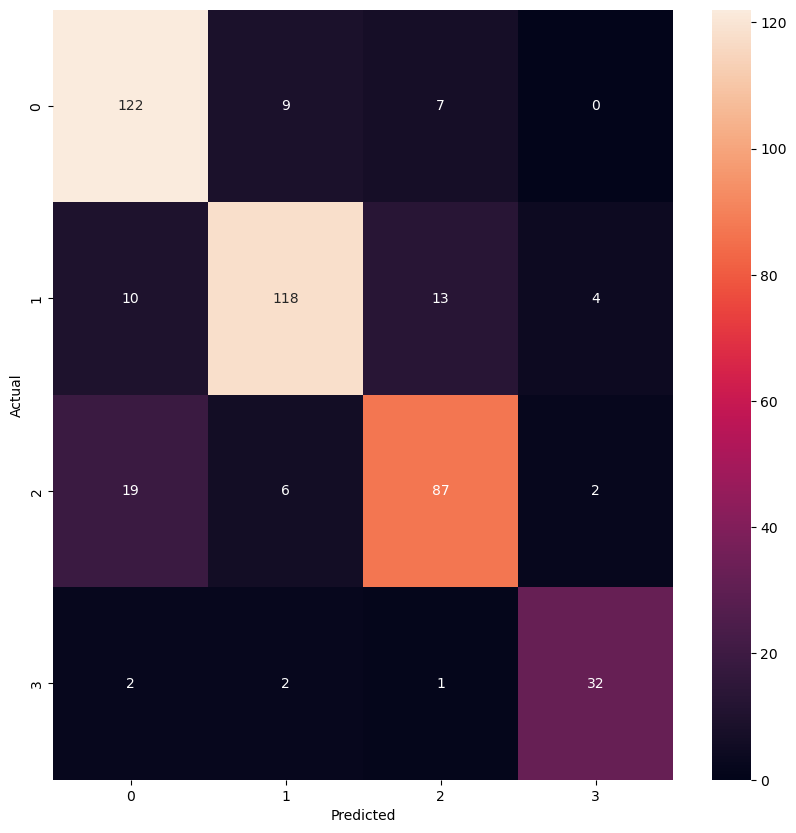

In [9]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()